In [183]:
#Compare runtimes of drama vs comedy movies, imdb dataset
import pandas as pd
import random

#Get random data from 1% of the file
readProportion = 0.01
data = pd.read_table('https://datasets.imdbws.com/title.basics.tsv.gz',
                    header=0, skiprows=lambda i: i > 0 and random.random() > readProportion,
                    sep='\t')
data = data.sample(frac=1)
#rids empty entries
dataFull = data[data.runtimeMinutes != r'\N'].copy()
#Converts runtime minutes from string to int
dataFull.loc[:, 'runtimeMinutes'] = dataFull.runtimeMinutes.astype(int)
#movies
movies = dataFull[dataFull.titleType == 'movie']

In [180]:
#Filtering dramas
drama = movies[movies.genres.str.contains('Drama')]

In [181]:
#Filtering comedies
comedy = movies[movies.genres.str.contains('Comedy')]

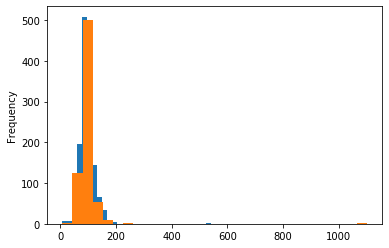

In [182]:
#Plot series as histograms
dramaMins = drama.runtimeMinutes.copy()
comedyMins = comedy.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaMins.plot.hist(bins=30)
comedyMins.plot.hist(bins=30)